## Identifing various customer groups with existing customer data

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [82]:
data=pd.read_csv("cutomer_segmentation.csv")

In [83]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [84]:
data.shape

(200, 5)

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [86]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [87]:
data=data.drop(['CustomerID'],axis=1)

## Exploratory Data Analysis

C:\Users\janani\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'count')

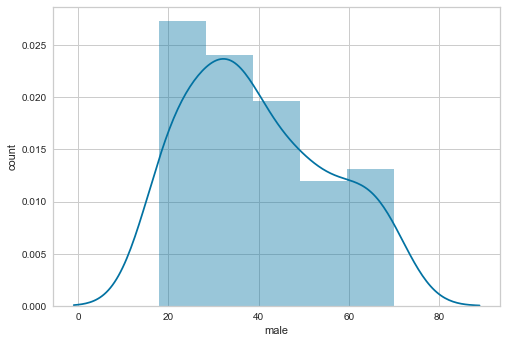

In [88]:
males_age=data[data['Gender']=='Male']['Age']
females_age=data[data['Gender']=='Female']['Age']
sns.distplot(males_age,bins=5)
plt.xlabel("male")
plt.ylabel("count")

C:\Users\janani\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'count')

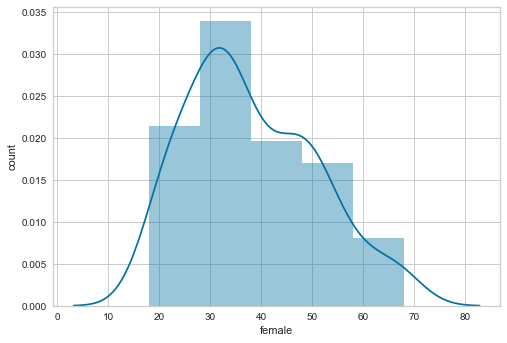

In [89]:
sns.distplot(females_age,bins=5)
plt.xlabel("female")
plt.ylabel("count")

In [90]:
def plot(df_cat,col):
    #col='job'
    f,(ax1)=plt.subplots(1,1,figsize=(30,10))
    ax1.hist(df_cat[col])
    ax1.set_title(col)
    ax1.set_xlabel(col)
    ax1.set_ylabel('density')

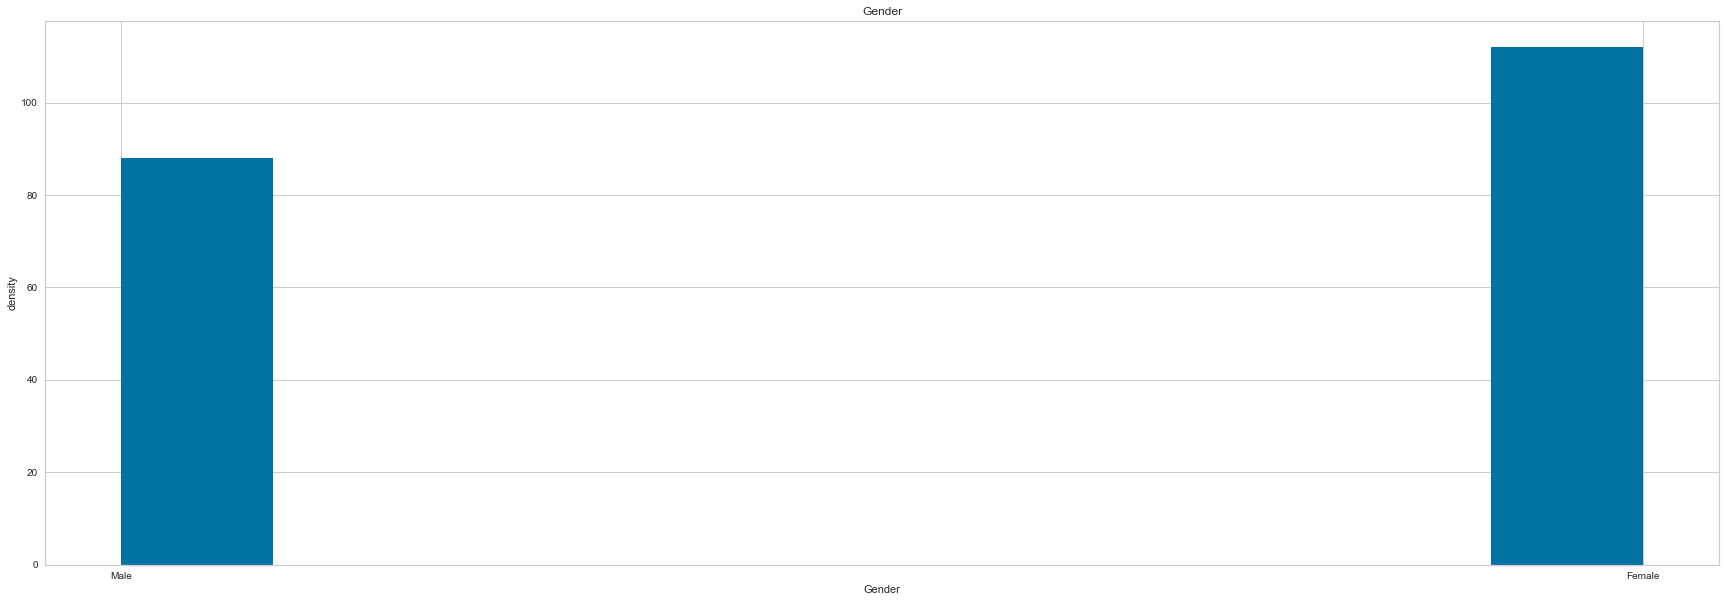

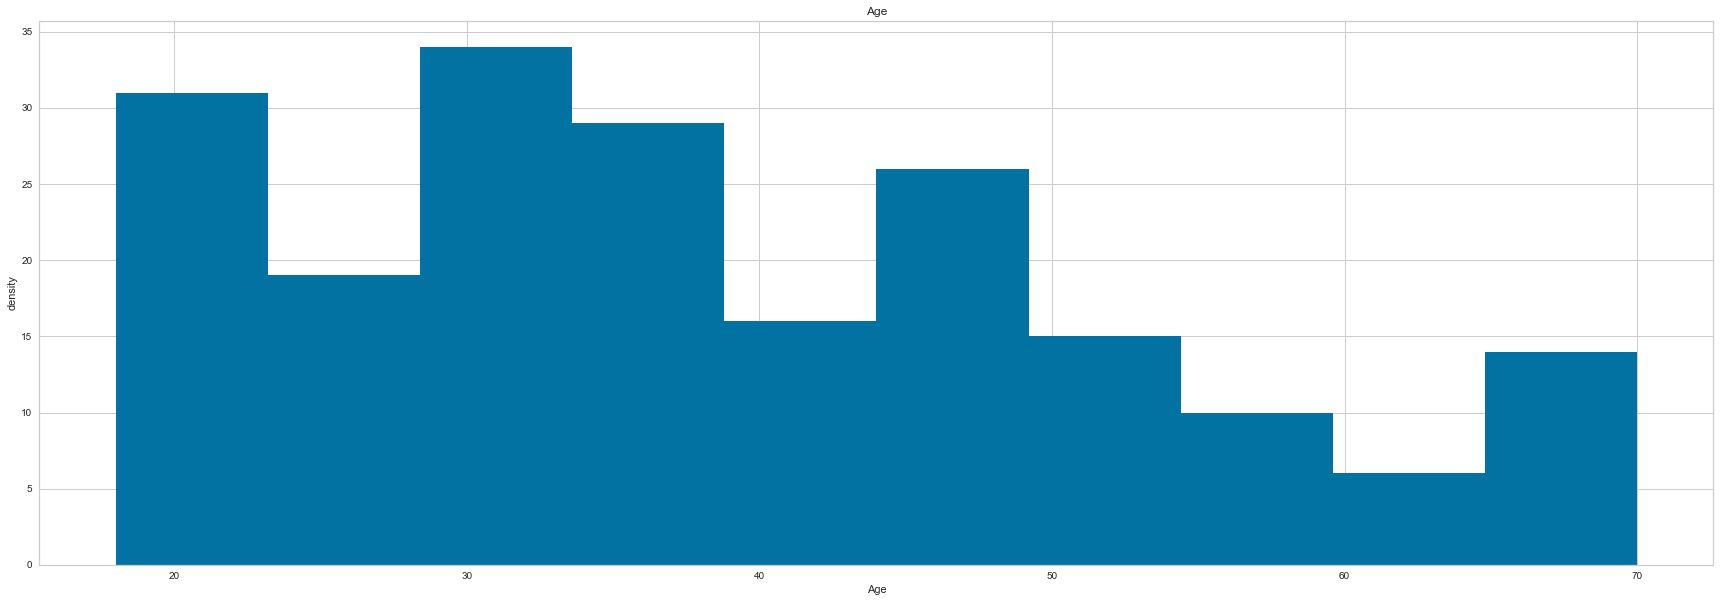

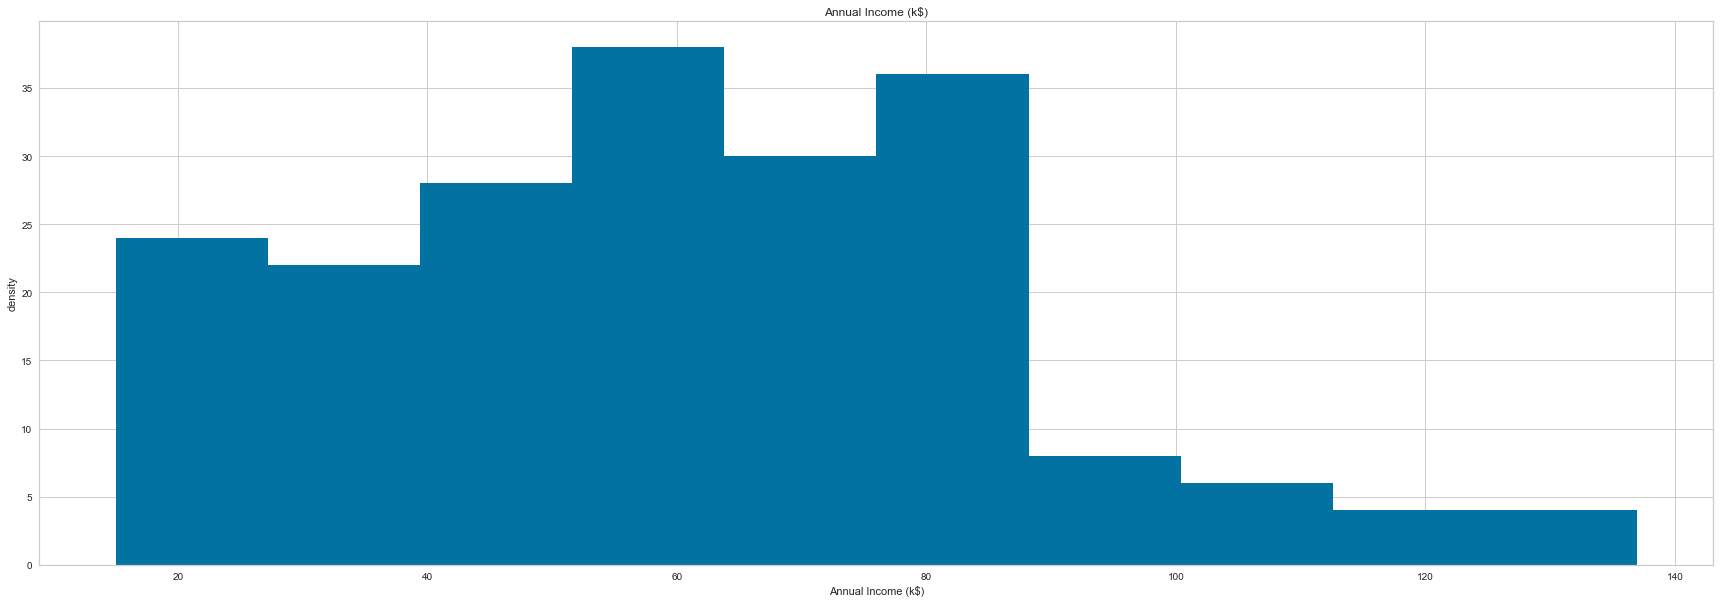

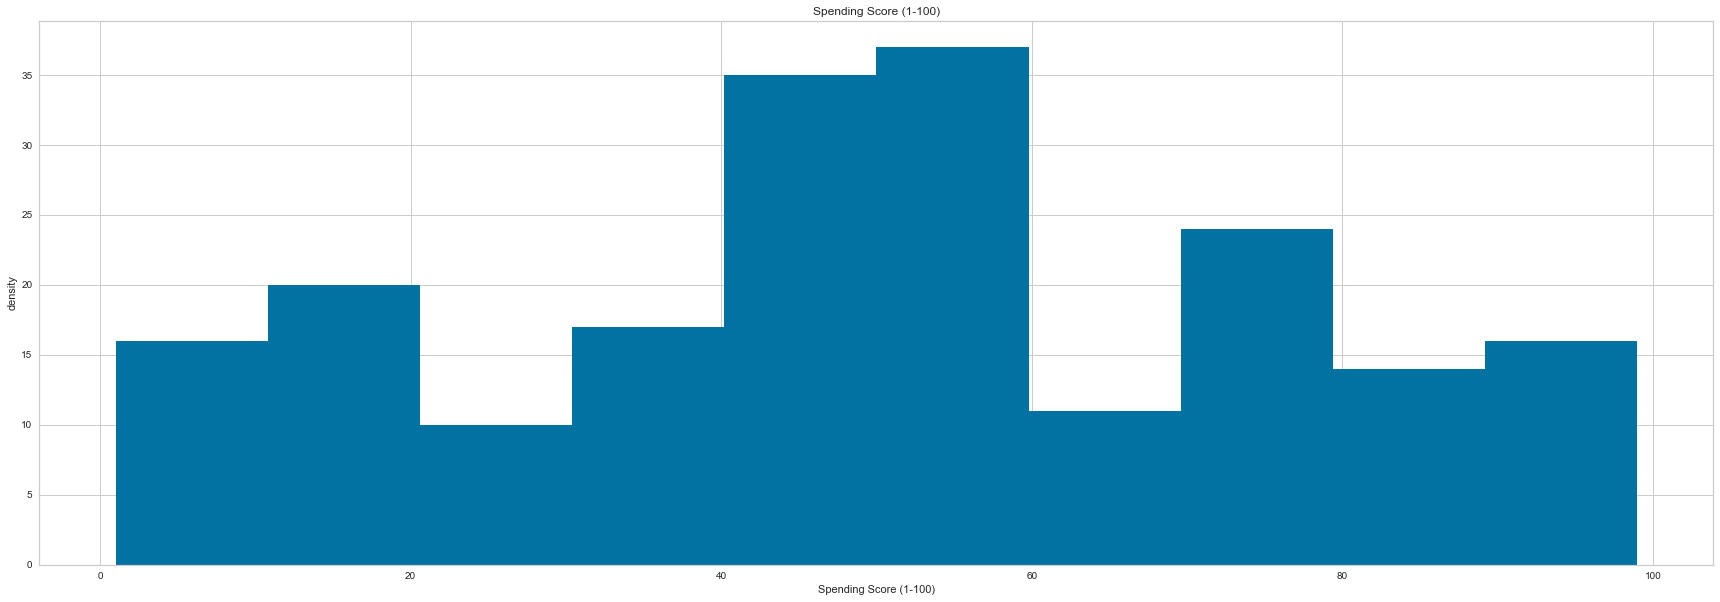

In [91]:
for col in data.columns:
    plot(data,col)

In [92]:
data.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

## Realationship study

In [93]:
corr=data[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].corr()

<AxesSubplot:>

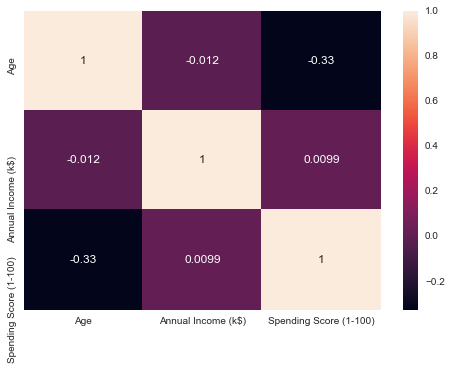

In [94]:
sns.heatmap(corr,annot=True)

## Kmeans clustering

In [95]:
data=data[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']]

#### Finding appropriate clusters using elbow method

In [96]:
n_clusters=[2,3,4,5,6,7,8,9,10]
cluster_inertia=[]
for n in n_clusters:
    kmeans=KMeans(n_clusters=n,init="k-means++").fit(data)
    cluster_inertia.append(kmeans.inertia_)

C:\Users\janani\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\janani\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\janani\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\janani\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Wi

In [97]:
cluster_inertia

[212840.1698209719,
 143342.751571706,
 104366.15145556198,
 75350.77917248776,
 58300.44332159069,
 51118.949931647294,
 45448.380705793716,
 40866.43764827453,
 38037.22908268553]

In [98]:
kmeans.labels_

array([4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 0, 5, 4, 1,
       4, 5, 0, 1, 1, 1, 0, 1, 1, 0, 0, 6, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       6, 0, 1, 1, 0, 6, 0, 0, 0, 1, 6, 6, 1, 6, 0, 6, 0, 6, 1, 6, 0, 1,
       1, 6, 0, 1, 6, 6, 1, 1, 6, 1, 6, 1, 1, 6, 0, 1, 6, 1, 0, 6, 0, 0,
       0, 1, 6, 1, 1, 1, 0, 6, 6, 6, 1, 6, 6, 2, 9, 2, 6, 2, 3, 2, 3, 2,
       1, 2, 9, 2, 3, 2, 9, 2, 3, 2, 1, 2, 9, 2, 3, 2, 9, 2, 3, 2, 3, 2,
       3, 2, 9, 2, 9, 2, 3, 2, 9, 2, 3, 2, 3, 2, 3, 2, 3, 2, 9, 2, 3, 2,
       3, 2, 3, 7, 8, 7, 8, 7, 8, 7, 8, 7, 8, 7, 8, 7, 8, 7, 8, 7, 8, 7,
       8, 7])

C:\Users\janani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


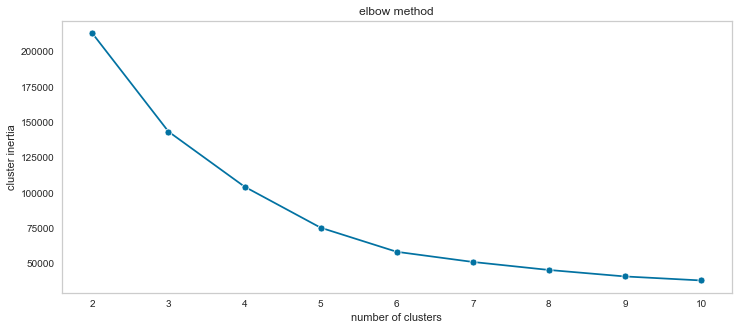

In [99]:
fig,ax=plt.subplots(figsize=(12,5))
ax=sns.lineplot(n_clusters,cluster_inertia,marker='o')
ax.set_title('elbow method')
ax.set_xlabel('number of clusters')
ax.set_ylabel('cluster inertia')
plt.grid()
plt.show()

In [100]:
#from the above graph "elbow" is found at cluster size 5 and 6 . 

#### Evaluating  Silhouette score for cluster size=5

In [101]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


C:\Users\janani\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick',
                     estimator=KMeans(n_clusters=5))

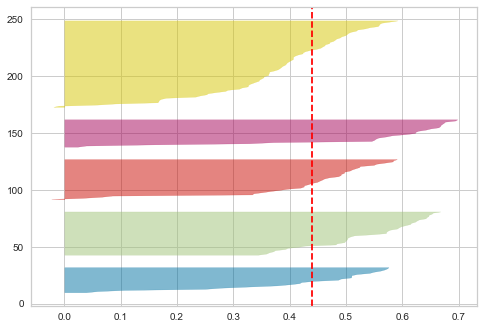

In [102]:
from yellowbrick.cluster import SilhouetteVisualizer
i=5
km = KMeans(n_clusters=5, init='k-means++')
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(df)

In [103]:
score = silhouette_score(df, km.labels_, metric='euclidean')
print('Silhouetter Score for cluster size=5: %.3f' % score)

Silhouetter Score for cluster size=5: 0.440


##### Checking kmeans clustering for cluster size 5

In [104]:
kmeans_cluster=KMeans(n_clusters=5,init='k-means++').fit(data)

C:\Users\janani\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [105]:
kmeans_cluster.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [106]:
df=data.copy()
data.loc[:,'cluster']=kmeans_cluster.labels_

C:\Users\janani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\janani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


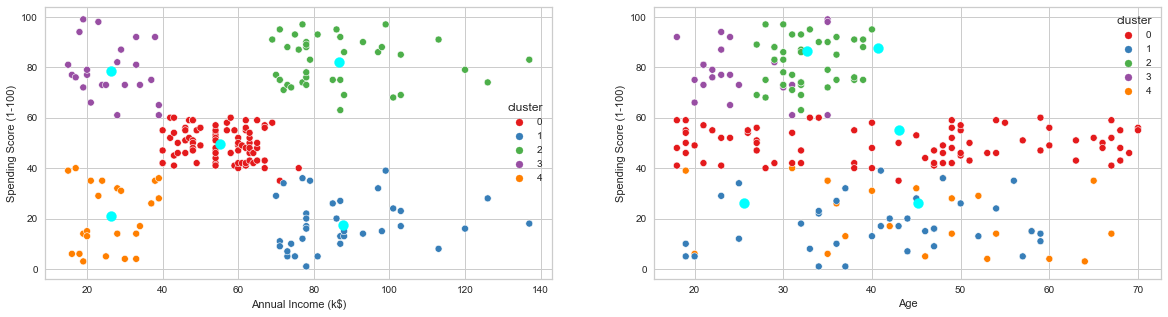

In [107]:
fig1,ax1=plt.subplots(1,2,figsize=(20,5))
scat1=sns.scatterplot('Annual Income (k$)','Spending Score (1-100)',data=data,hue='cluster',palette='Set1',ax=ax1[0])
scat2=sns.scatterplot('Age','Spending Score (1-100)',data=data,hue='cluster',palette='Set1',ax=ax1[1],legend='full')
ax1[0].scatter(kmeans_cluster.cluster_centers_[:,1], kmeans_cluster.cluster_centers_[:,2], s=100, c='cyan', label='Centroids')
ax1[1].scatter(kmeans_cluster.cluster_centers_[:,0], kmeans_cluster.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')


#### Algorithm generated 5 clusters

cluster 0:customers with low spending score and high annual income(70k-140k)

cluster1:customers with medium spending  score and medium annual income(40k-80k)

cluster2:customers with high spending score and high annual income(70k-140k)

cluster3:customers with high spending score and low annual income(20k-40k)

cluster 4:customers with low spending score and low annual income(20k-40k)



###### There no distinct groups in terms of age , however  target customers with high spending in accordance to the  age group and annual income will be those having annual income of 20k-40k with the age group of 20-30 years.